# Refugee Deaths Analysis

Analysis will be performed using Python Tools.
The Source of data: www.unitedagainstracism.org
Data was taken from https://github.com/ondata/the-list
Dataset contains data about deaths of refugees since 1993 to 2018 year, amount of deaths, place, reasons, etc.

In [1]:
# Load necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [2]:
#Import dataset
df = pd.read_csv('refugeesAndMigrants.csv')

In [4]:
#First 10 rows
df.head(10)

,found dead,number,"name, gender, age",region of origin,cause of death,source,country of incident
0,05/05/18,4.0,N.N. (1 man),Africa,1 died off coast of Tripoli (LY) after Libyan ...,AFP/IOM Libya/BangkokPost,Libya
1,30/04/18,2.0,N.N. (2 men),unknown,bodies recovered in Gasr Garabulli (aka Castel...,IOM Libya,Libya
2,30/04/18,1.0,N.N. (woman),unknown,body recovered on Tajoura beach (LY),IOM Libya,Libya
3,30/04/18,6.0,N.N. (1 baby; 5 men),unknown,bodies recovered in Zuwara (LY),IOM Libya,Libya
4,30/04/18,1.0,N.N. (man),Algeria,drowned trying to swim across the Kolpa River ...,IOM Slovenia/TotSloveniaNews,unknown
5,29/04/18,19.0,N.N. (1 man),Africa,"16 drowned in shipwreck off Cap Falcon, Oran (...",ObsAlgerie/Caminando/EFE/Réf/QUOTI/IOM,Algeria
6,25/04/18,17.0,N.N.,Sub-Saharan Africa,5 drowned afer boat sank between Morocco and S...,ElDiario/Caminando/SalvaM/EuroPress,unknown
7,22/04/18,11.0,N.N. (1 boy; 10 men),unknown,drowned when rubber dinghy overturned in the M...,MEE/Reu./IOM Libya/JapanTimes,Libya
8,20/04/18,1.0,"N.N. (boy, 6 months)",Eritrea,strangled by desperate mother who hanged herse...,Berliner Ztg/FR-th/OTZ,Germany
9,20/04/18,1.0,"Snaid Tadese (woman, 19)",Eritrea,"suicide, strangled her baby and hanged herself...",Berliner Ztg/FR-th/OTZ,Germany


In [5]:
#Dataset characteristics
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3932 entries, 0 to 3931
Data columns (total 7 columns):
found dead             3931 non-null object
number                 3931 non-null float64
name, gender, age      3931 non-null object
region of origin       3931 non-null object
cause of death         3931 non-null object
source                 3931 non-null object
country of incident    3932 non-null object
dtypes: float64(1), object(6)
memory usage: 215.1+ KB


In [26]:
#Create 'date' column converting 'found dead' column to datetime type
df['date'] = pd.to_datetime(df['found dead'], format='%d/%m/%y', errors='coerce')

In [30]:
#Create columns 'year', 'month', 'day', 'weekday'
df['year'] = df['date'].apply(lambda x: x.year)
df['month'] = df['date'].apply(lambda x: x.month)
df['day'] = df['date'].apply(lambda x: x.day)
df['weekday'] = df['date'].apply(lambda x: x.weekday())

In [31]:
df.head()

,found dead,number,"name, gender, age",region of origin,cause of death,source,country of incident,date,year,month,day,weekday
0,05/05/18,4.0,N.N. (1 man),Africa,1 died off coast of Tripoli (LY) after Libyan ...,AFP/IOM Libya/BangkokPost,Libya,2018-05-05,2018.0,5.0,5.0,5.0
1,30/04/18,2.0,N.N. (2 men),unknown,bodies recovered in Gasr Garabulli (aka Castel...,IOM Libya,Libya,2018-04-30,2018.0,4.0,30.0,0.0
2,30/04/18,1.0,N.N. (woman),unknown,body recovered on Tajoura beach (LY),IOM Libya,Libya,2018-04-30,2018.0,4.0,30.0,0.0
3,30/04/18,6.0,N.N. (1 baby; 5 men),unknown,bodies recovered in Zuwara (LY),IOM Libya,Libya,2018-04-30,2018.0,4.0,30.0,0.0
4,30/04/18,1.0,N.N. (man),Algeria,drowned trying to swim across the Kolpa River ...,IOM Slovenia/TotSloveniaNews,unknown,2018-04-30,2018.0,4.0,30.0,0.0


### Barplot of countries with greatest amount of incidents

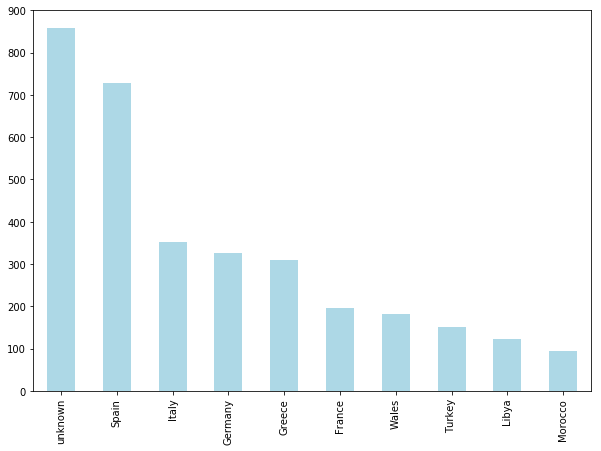

In [45]:
ax = plt.figure(figsize=(10, 7)).gca()
df['country of incident'].value_counts().head(10).plot.bar(color = 'lightblue')
plt.show()

### Barplot of countries with greatest amount of deaths

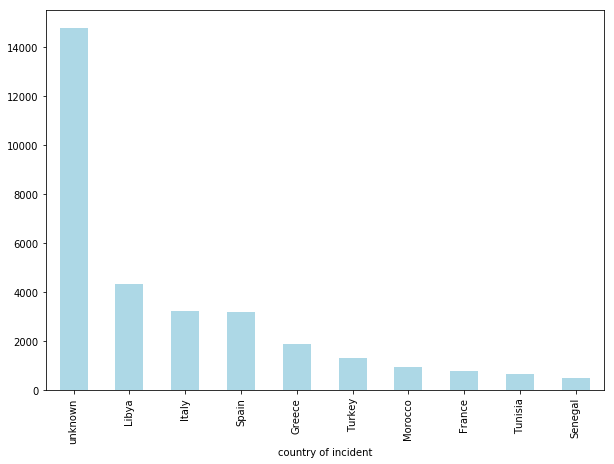

In [53]:
ax = plt.figure(figsize=(10, 7)).gca()
group = df.groupby(['country of incident'])['number'].sum()
group = group.sort_values(ascending=False)
group.head(10).plot.bar(color = 'lightblue')
plt.show()

### Barplot of countries with greatest amount of deaths of people who are from these countries

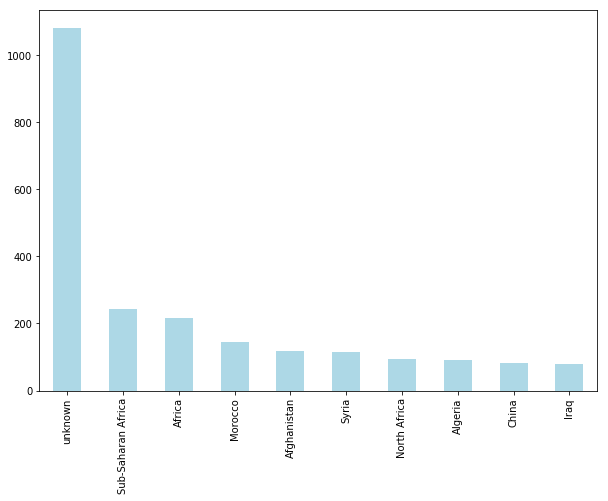

In [47]:
ax = plt.figure(figsize=(10, 7)).gca()
df['region of origin'].value_counts().head(10).plot.bar(color = 'lightblue')
plt.show()

### Barplot of countries with greatest amount of incidents with people who are from these countries

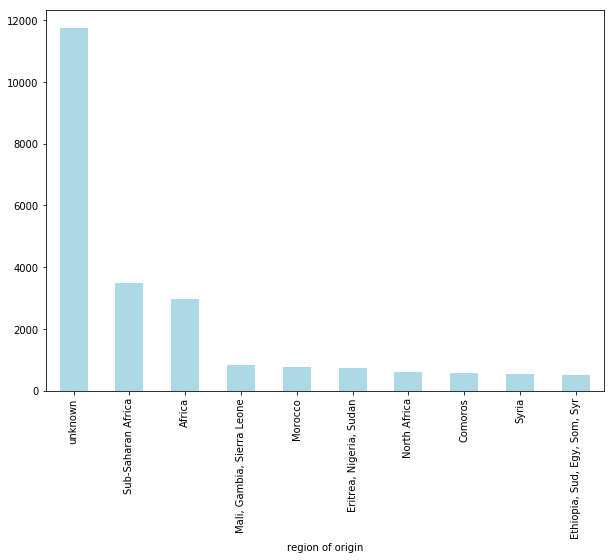

In [54]:
ax = plt.figure(figsize=(10, 7)).gca()
group = df.groupby(['region of origin'])['number'].sum()
group = group.sort_values(ascending=False)
group.head(10).plot.bar(color = 'lightblue')
plt.show()

### Amount of deaths by year and country of incident

In [42]:
df.groupby(['year','country of incident'])['number'].sum()

year    country of incident  
1993.0  Austria                     7.0
        France                      3.0
        Germany                    26.0
        Switzerland                 3.0
        Wales                       2.0
        unknown                    12.0
1994.0  Belgium                     1.0
        France                      4.0
        Germany                    33.0
        Greece                      9.0
        India                       1.0
        Italy                      17.0
        Morocco                     8.0
        Poland                      8.0
        Spain                       2.0
        Sweden                      1.0
        Switzerland                 1.0
        Wales                       3.0
        unknown                     7.0
1995.0  Belgium                     4.0
        France                      8.0
        Germany                    43.0
        Greece                      5.0
        Hungary                    18.0
        It

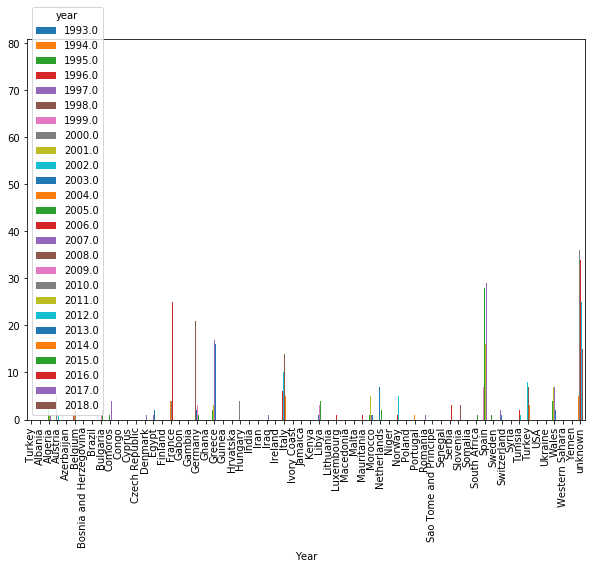

In [56]:
ax = plt.figure(figsize=(10,7)).gca()
country_year.plot.bar(ax=ax)
plt.xlabel('Year')
plt.show()